In [95]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [99]:
from PIL import Image
import os

# set the directory where the images are stored
image_dir_train = '../../../dataset_TL/train_dataset/train_images/'

# create a list to store the images
train_images = []

# loop through each file in the directory
for filename in os.listdir(image_dir_train):
    # open the file using Pillow
    img = Image.open(os.path.join(image_dir_train, filename))
    # append the image to the list
    train_images.append(img)



In [ ]:
image_dir_test = '../../../dataset_TL/test_dataset/test_images/'

test_images = []

for filename in os.listdir(image_dir_test):
    # open the file using Pillow
    img = Image.open(os.path.join(image_dir_test, filename))
    # append the image to the list
    test_images.append(img)

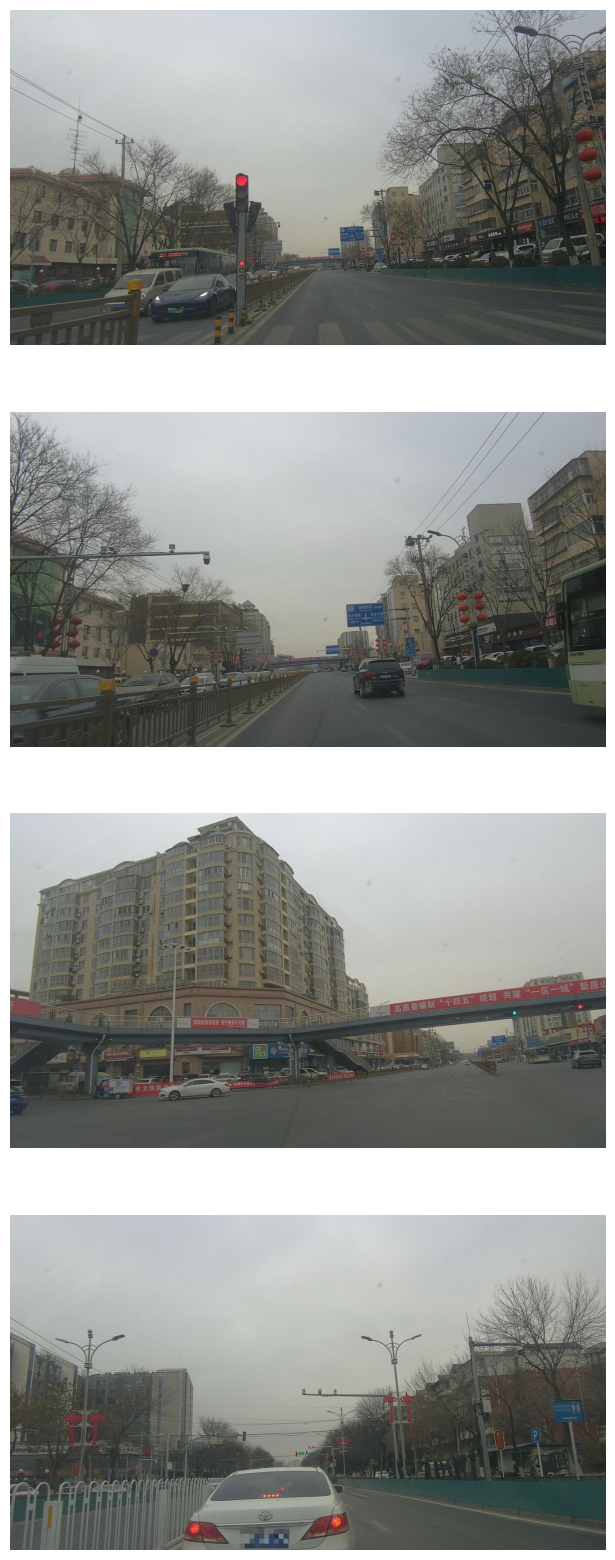

In [97]:
import matplotlib.pyplot as plt

# set the figure size
fig, ax = plt.subplots(4, 1, figsize=(100,20))

# loop through the first 5 images in the list
for i in range(4):
    # plot the image
    ax[i].imshow(train_images[i])
    # turn off the axis labels
    ax[i].axis('off')

# show the plot
plt.show()

In [98]:
print("Number of images:", len(train_images))

Number of images: 2600


TypeError: Image data of dtype object cannot be converted to float

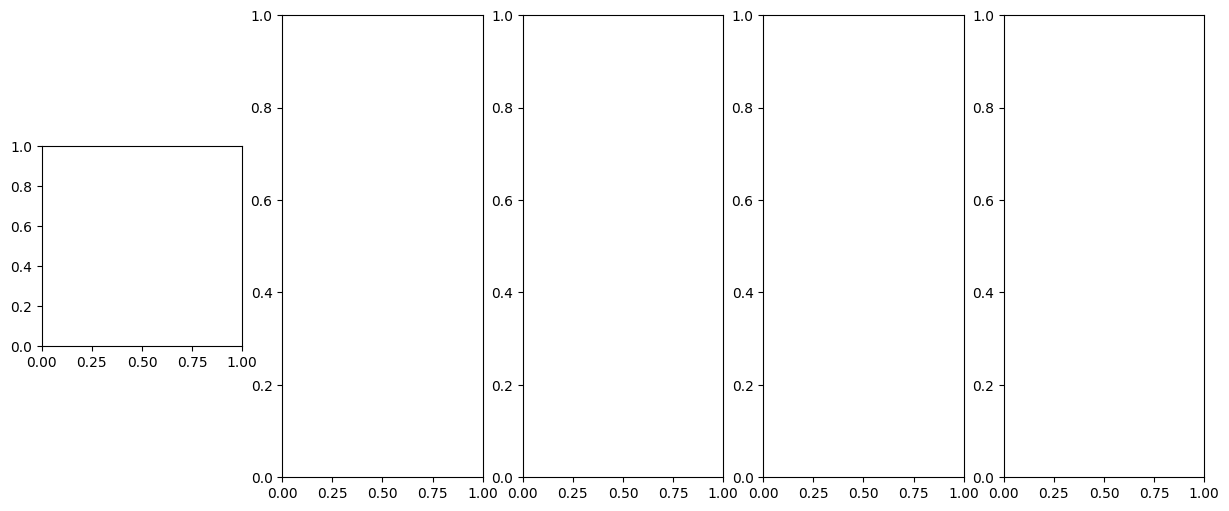

In [108]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# set the directory where the images are stored
image_dir_train = '../../../dataset_TL/train_dataset/train_images/'
# set the directory where the JSON file is stored
label_dir_train = '../../../dataset_TL/train_dataset/train.json'

# create a list to store the images and labels
train_images = []
train_labels = []

# load the JSON file
with open(label_dir_train, 'r') as f:
    data = json.load(f)

# loop through each annotation in the JSON file
for i, annotation in enumerate(data['annotations']):
    if i == 5:
        break
    # get the filename and bounding box coordinates
    filename = annotation['filename']
    bbox = annotation['bndbox']
    # open the file using Pillow
    with Image.open(os.path.join(image_dir_train, filename.split('\\')[-1])) as img:
        # append the image to the list
        train_images.append(img)
        # append the label to the list
        train_labels.append(bbox)

# set the figure size
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))

# loop through the first 5 images in the list
for i in range(5):
    # plot the image with its label
    axes[i].imshow(train_images[i])
    axes[i].set_title("Image {}".format(i+1))
    axes[i].axis('off')
    # plot the bounding box
    bbox = train_labels[i]
    x = bbox['xmin']
    y = bbox['ymin']
    w = bbox['xmax'] - bbox['xmin']
    h = bbox['ymax'] - bbox['ymin']
    rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
    axes[i].add_patch(rect)

# show the plot
plt.tight_layout()
plt.show()

In [67]:
train_datagen =ImageDataGenerator(rescale = 1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,)
training_set = train_datagen.flow_from_directory("../../../dataset_TL/train_dataset/",
                                                 target_size = (image_size_w,image_size_h),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 2600 images belonging to 1 classes.


In [45]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("../../../dataset_TL/test_dataset",
                                            target_size = (image_size, image_size),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 400 images belonging to 1 classes.


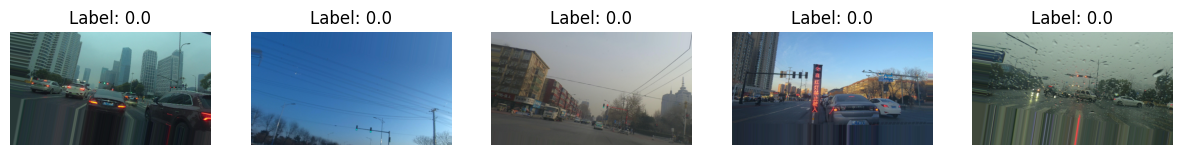

In [68]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training set
images, labels = next(training_set)

# Create a grid of 5 subplots with the same size
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Plot each image in a separate subplot
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title("Label: {}".format(labels[i]))
    ax.axis('off')
    if i == 4:
        break

plt.show()